In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [6]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')

In [7]:
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,01/03/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,01/04/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,01/05/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,01/06/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,01/09/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [8]:

training_set = dataset_train.iloc[:, 1: 2].values

In [9]:
training_set.shape

(1509, 1)

In [10]:
sc = MinMaxScaler(feature_range = (0, 1))
#fit: get min/max of train data
training_set_scaled = sc.fit_transform(training_set)

In [11]:
X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60: i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [12]:
X_train.shape

(1449, 60)

In [13]:
y_train.shape

(1449,)

In [14]:
X_train = np.reshape(X_train, newshape =
                     (X_train.shape[0], X_train.shape[1], 1))

In [15]:
X_train.shape

(1449, 60, 1)

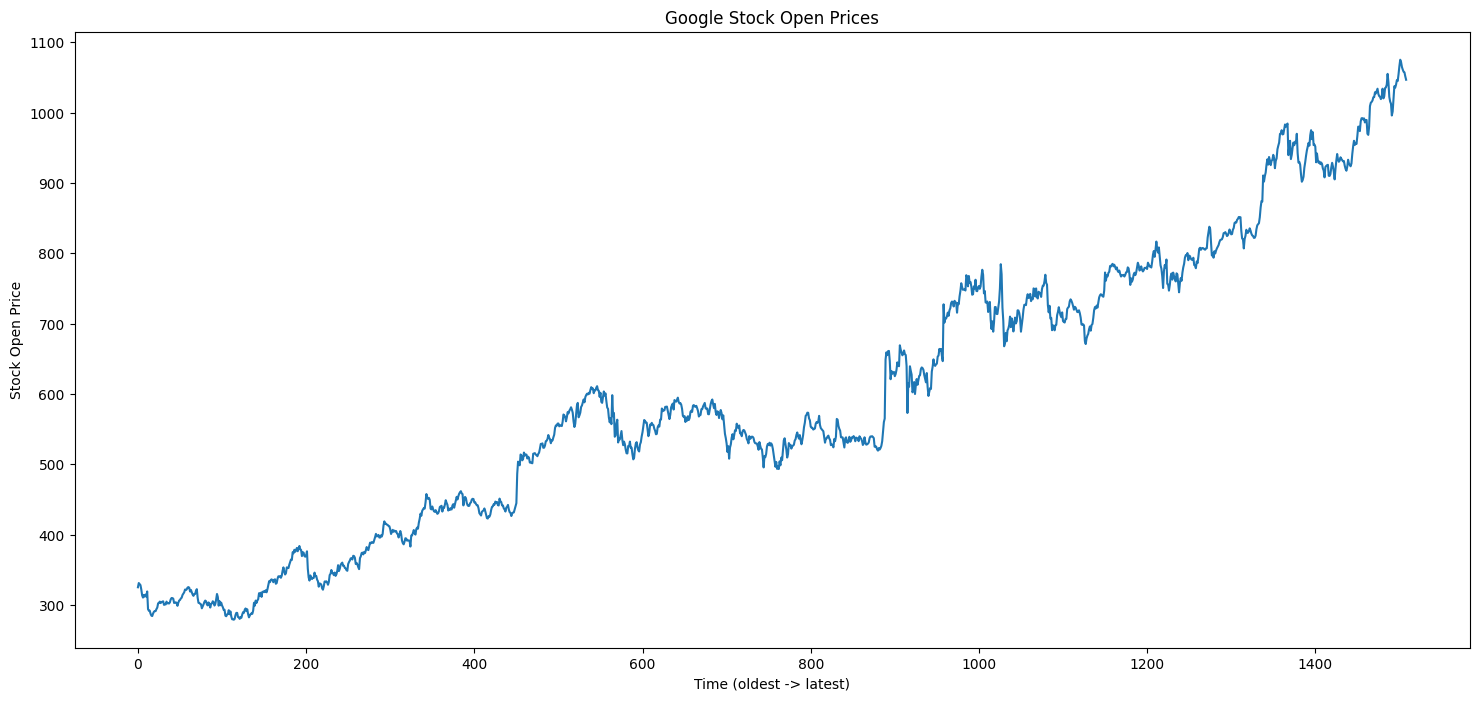

In [16]:
plt.figure(figsize=(18, 8))
plt.plot(dataset_train['Open'])
plt.title("Google Stock Open Prices")
plt.xlabel("Time (oldest -> latest)")
plt.ylabel("Stock Open Price")
plt.show()

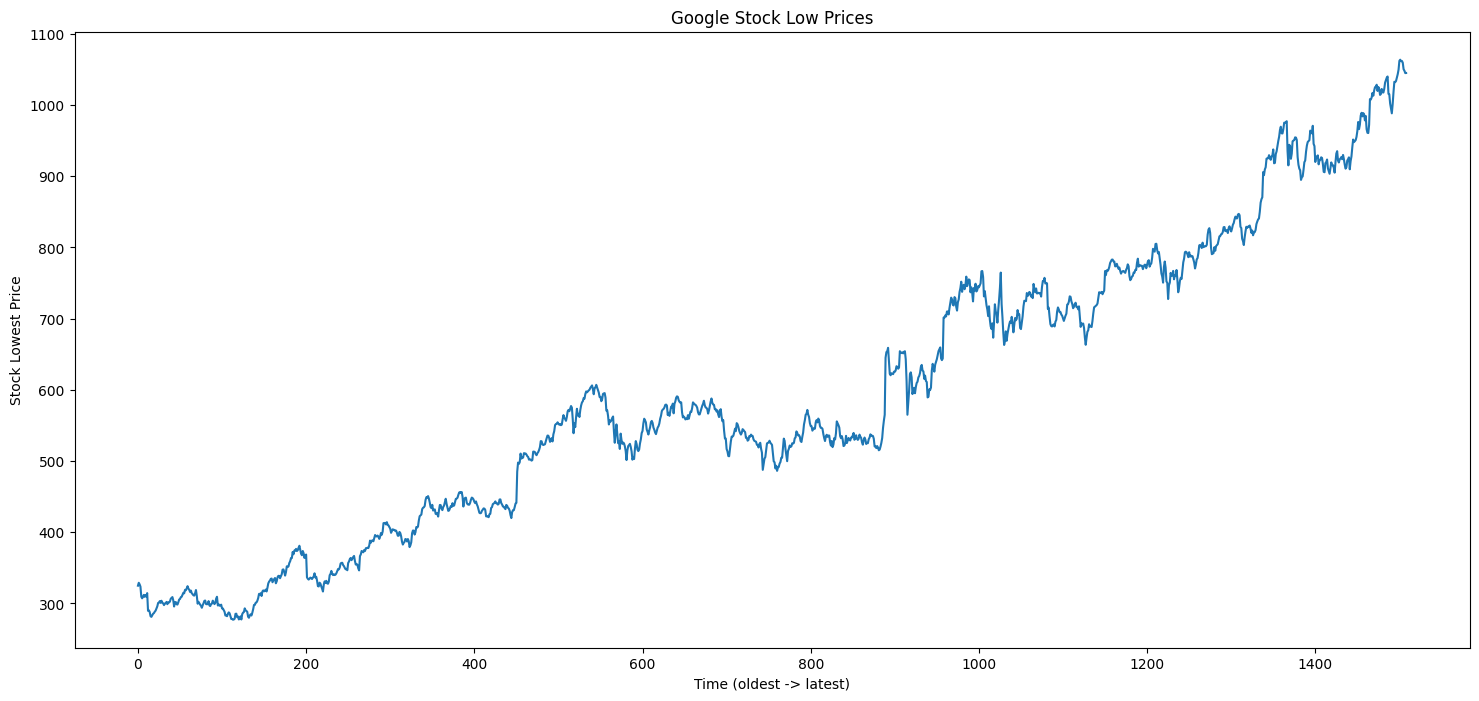

In [17]:
plt.figure(figsize=(18, 8))
plt.plot(dataset_train['Low'])
plt.title("Google Stock Low Prices")
plt.xlabel("Time (oldest -> latest)")
plt.ylabel("Stock Lowest Price")
plt.show()

In [18]:
regressor = Sequential()
#add 1st lstm layer
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(rate = 0.2))

##add 2nd lstm layer: 50 neurons
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate = 0.2))

##add 3rd lstm layer
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate = 0.2))

##add 4th lstm layer
regressor.add(LSTM(units = 50, return_sequences = False))
regressor.add(Dropout(rate = 0.2))

##add output layer
regressor.add(Dense(units = 1))

In [19]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [20]:
regressor.fit(x = X_train, y = y_train, batch_size = 32, epochs = 100)

Epoch 1/100
46/46 [==============================] - 13s 21ms/step - loss: 0.0301
Epoch 2/100
46/46 [==============================] - 1s 19ms/step - loss: 0.0036
Epoch 3/100
46/46 [==============================] - 1s 20ms/step - loss: 0.0033
Epoch 4/100
46/46 [==============================] - 1s 20ms/step - loss: 0.0028
Epoch 5/100
46/46 [==============================] - 1s 19ms/step - loss: 0.0034
Epoch 6/100
46/46 [==============================] - 1s 20ms/step - loss: 0.0029
Epoch 7/100
46/46 [==============================] - 1s 27ms/step - loss: 0.0028
Epoch 8/100
46/46 [==============================] - 1s 26ms/step - loss: 0.0035
Epoch 9/100
46/46 [==============================] - 1s 26ms/step - loss: 0.0028
Epoch 10/100
46/46 [==============================] - 1s 25ms/step - loss: 0.0026
Epoch 11/100
46/46 [==============================] - 1s 19ms/step - loss: 0.0025
Epoch 12/100
46/46 [==============================] - 1s 19ms/step - loss: 0.0022
Epoch 13/100
46/46 [====

In [21]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')

In [22]:
dataset_test.head()

,Date,Open,High,Low,Close,Volume
0,02/01/2018,1048.339966,1066.939941,1045.229980,1065.000000,1237600
1,03/01/2018,1064.310059,1086.290039,1063.209961,1082.479980,1430200
2,04/01/2018,1088.000000,1093.569946,1084.001953,1086.400024,1004600
3,05/01/2018,1094.000000,1104.250000,1092.000000,1102.229980,1279100
4,08/01/2018,1102.229980,1111.270020,1101.619995,1106.939941,1047600


In [23]:
real_stock_price = dataset_test.iloc[:, 1: 2].values
real_stock_price.shape

(125, 1)

In [24]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']),
                          axis = 0)
##use .values to make numpy array
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

In [25]:
inputs = inputs.reshape(-1, 1)

#scale input
inputs = sc.transform(inputs)

In [26]:
len(inputs)

185

In [27]:
X_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
#add dimension of indicator
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [28]:
X_test.shape

(125, 60, 1)

In [29]:
predicted_stock_price = regressor.predict(X_test)

4/4 [==============================] - 2s 9ms/step


In [30]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

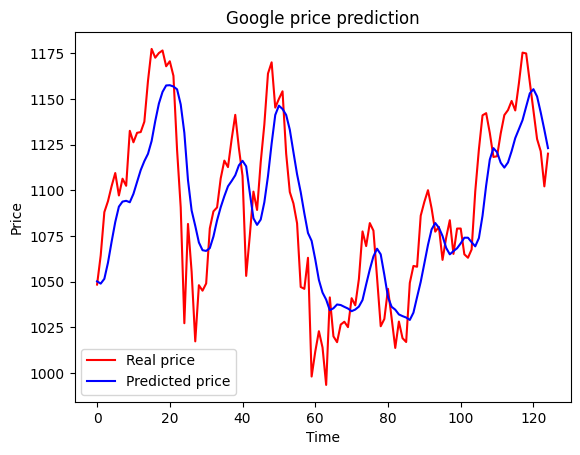

In [32]:
plt.plot(real_stock_price, color = 'red', label = 'Real price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted price')

plt.title('Google price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()